## Libraries

In [260]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
from copy import deepcopy
from collections import Counter

## Extracting the data from the dataset

In [2]:
json_data = []
for line in open(r"/home/rrgoyal/Ram/Sem_III/Research Methods/Implementation/train_pair_data.jsonlist",'r'):
    json_data.append(json.loads(line))

## Creating a dataframe from the data

In [3]:
df = pd.DataFrame().from_records(json_data)

## Extracting the comments out of the dataframe

In [8]:
positiveComments=[]
for comment_box in [comms['comments'] for comms in df['positive']]:
    for comment in comment_box:
        positiveComments.append(comment['body'])


negativeComments=[]
for comment_box in [comms['comments'] for comms in df['negative']]:
    for comment in comment_box:
        negativeComments.append(comment['body'])


3456

## Extracting the comments with some evidence link present

In [21]:
positive_comments_with_evidence = [comment for comment in positiveComments if re.search('http',comment) 
                                   is not None]
        
negative_comments_with_evidence = [comment for comment in negativeComments if re.search('http',comment) 
                                   is not None]

Text(0.5, 1.0, 'Negative Comments')

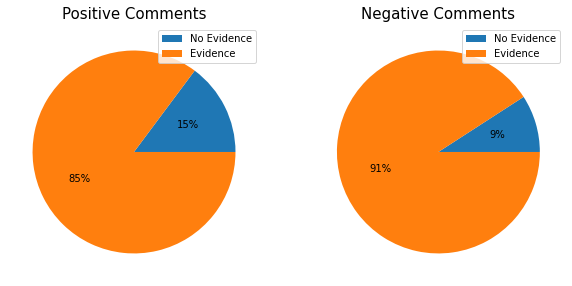

In [40]:
fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].pie([len(positive_comments_with_evidence),len(positiveComments)],autopct="%1.0f%%")
ax[0].legend(['No Evidence','Evidence'])
ax[0].set_title("Positive Comments with Evidence",fontsize=15)

ax[1].pie([len(negative_comments_with_evidence),len(negativeComments)],autopct="%1.0f%%")
ax[1].legend(['No Evidence','Evidence'])
ax[1].set_title("Negative Comments with Evidence",fontsize=15)

## Extracting urls out of the comments

In [253]:
positive_urls = [re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
                           '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', comment)
                 for comment in positive_comments_with_evidence]
negative_urls = [re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
                           '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', comment)
                 for comment in negative_comments_with_evidence]

### Formatting the urls

In [254]:
""" Some of the urls in the positive and negative url list are present inside another list which means
    that the positive or negative url list has nested lists """

# Taking out all the elements of the nested lists.
formatted_positive_lists = []
for positive_url in positive_urls:
    for url in positive_url:
        formatted_positive_lists.append(url)
        
formatted_negative_lists = []
for negative_url in negative_urls:
    for url in negative_url:
        formatted_negative_lists.append(url)
        
positive_urls = deepcopy(formatted_positive_lists)
negative_urls = deepcopy(formatted_negative_lists)

## Identifying the type of evidence provided

In [361]:
# Getting the last element as the extension of the media is present at the last of link preceded by a '.'
positive_evidence = [url.split('.')[-1] for url in positive_urls]
negative_evidence = [url.split('.')[-1] for url in negative_urls]

# Removing empty elements
positive_evidence = list(filter(None,positive_evidence))
negative_evidence = list(filter(None,negative_evidence))

To get the major types of media being sent as an evidence, an elimination approach is used. By looking at the data some of the extensions are recognized and then a search is made to find similar ones. After that, they are replaced in the original string by their extensions and all the redundant characters are removed. This helps to create a list with nothing but the strings of valid extensions so that the Collections.Counter can be used to identify the count of all extensions.

In [362]:
positive_extensions = []
negative_extensions = []

positive_indices = []
negative_indices = []

def remove_and_append(i,index_type,extension,evidence):
        if len(re.findall(r'.*{}.*'.format(extension),evidence.lower()))>0:
            index_type.append(i)
            return extension
        
def delete_indices():
    global positive_indices,negative_indices
    
    for index in sorted(positive_indices,reverse=True):
        del positive_evidence[index]
        
    for index in sorted(negative_indices,reverse=True):
        del negative_evidence[index]
        
    positive_indices=[]
    negative_indices = []

extensions = ['pdf','htm','jpg','png','php','svg','gif','aspx','watch\?v','/wiki','/article','/video','/blog'
             ,'edu/','news?r?o?o?m/','forums/','papers/','reports/','com/story/','stories/','/post/',
              'r/.+/comments/','txt','jsp','asp','books\?','/research?/']

for extension in extensions:
    positive_extensions += [remove_and_append(i,positive_indices,extension,evidence) 
                                for i,evidence in enumerate(positive_evidence)]
    
    negative_extensions += [remove_and_append(i,negative_indices,extension,evidence2) 
                                for i,evidence2 in enumerate(negative_evidence)]
    
    delete_indices()
    
positive_extensions = list(filter(None,positive_extensions))
negative_extensions = list(filter(None,negative_extensions))

In [363]:
positive_types = Counter(positive_extensions)
negative_types = Counter(negative_extensions)

In [364]:
def combine_keys(_types,new_key_name,old_keys_list):
    _types[new_key_name] = 0
    for key in old_keys_list:
        _types[new_key_name] += _types[key]
        del _types[key]
        
    return _types

In [365]:
# Configuring positive types

positive_types = combine_keys(positive_types,'images',['jpg','png','jpeg','svg','gif'])
positive_types = combine_keys(positive_types,'text',['pdf','/wiki','/article','papers/','reports/','txt','/research?/','books\?'])
positive_types = combine_keys(positive_types,'pages',['htm','php','aspx','/blog','edu/','/post/','jsp','asp','forums/'])
positive_types = combine_keys(positive_types,'videos',['watch\?v','/video','com/story/','stories/'])
positive_types = combine_keys(positive_types,'comments',['r/.+/comments/'])
positive_types = combine_keys(positive_types,'news',['news?r?o?o?m/'])

# Configuring negative types

negative_types = combine_keys(negative_types,'images',['jpg','png','jpeg','svg','gif'])
negative_types = combine_keys(negative_types,'text',['pdf','/wiki','/article','papers/','reports/','txt','/research?/','books\?'])
negative_types = combine_keys(negative_types,'pages',['htm','php','aspx','/blog','edu/','/post/','jsp','asp','forums/'])
negative_types = combine_keys(negative_types,'videos',['watch\?v','/video','com/story/','stories/'])
negative_types = combine_keys(negative_types,'comments',['r/.+/comments/'])
negative_types = combine_keys(negative_types,'news',['news?r?o?o?m/'])

Text(0.5, 1.0, 'Negative Comments')

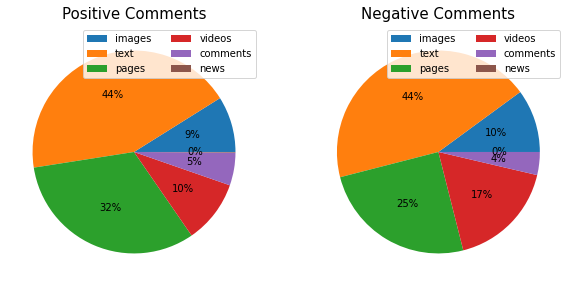

In [382]:
fig,ax = plt.subplots(1,2,figsize=(10,10))

positive_types = dict(positive_types)
ax[0].pie(positive_types.values(),autopct="%1.0f%%")
ax[0].legend(positive_types.keys(),loc = "upper right",ncol=2)
ax[0].set_title("Positive Comments",fontsize=15)

negative_types = dict(negative_types)
ax[1].pie(negative_types.values(),autopct="%1.0f%%")
ax[1].legend(negative_types.keys(),loc = "upper right",ncol=2)
ax[1].set_title("Negative Comments",fontsize=15)